Load the data

In [1]:
import pandas as pd

data = pd.read_excel("/content/drive/My Drive/Intelligent Programming/fitness_coach_agent/data/gym recommendation.xlsx", index_col=0)
data.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
ID,,,,,,,,,,,,,,
1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


Data Preprocessing

In [2]:
print(data.shape)
print(data.isna().sum())
print(data.duplicated().sum())

cleaned_data = data.copy()
cleaned_data = cleaned_data.drop_duplicates().reset_index(drop=True)
print(cleaned_data.duplicated().sum())

(14589, 14)
Sex               0
Age               0
Height            0
Weight            0
Hypertension      0
Diabetes          0
BMI               0
Level             0
Fitness Goal      0
Fitness Type      0
Exercises         0
Equipment         0
Diet              0
Recommendation    0
dtype: int64
2437
0


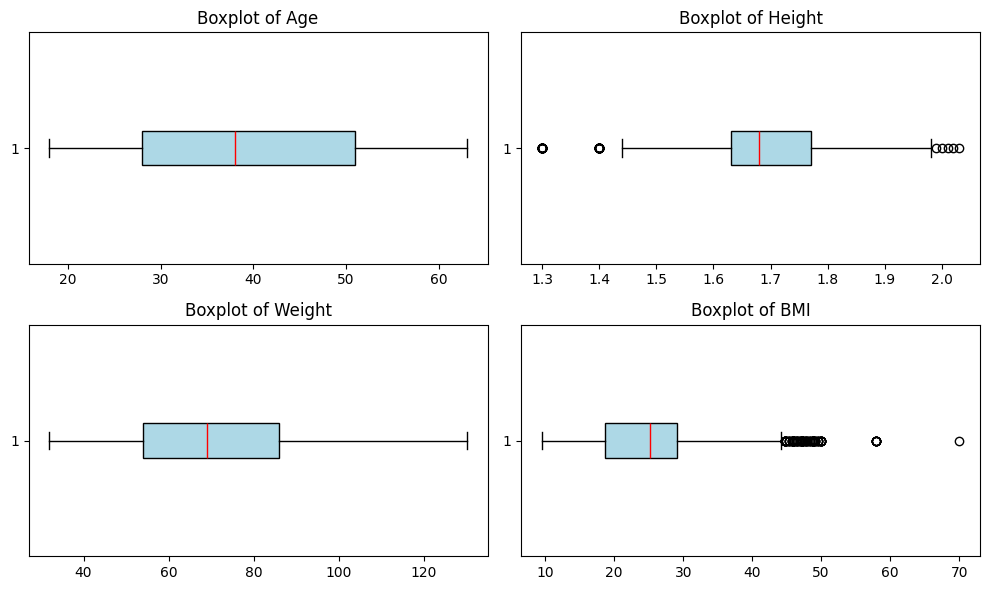

In [3]:
import matplotlib.pyplot as plt

numeric_features = ['Age', 'Height', 'Weight', 'BMI']

plt.figure(figsize=(10, 6))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(cleaned_data[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue'),
                medianprops=dict(color='red'))
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

for col in numeric_features:
  Q1 = cleaned_data[col].quantile(0.25)
  Q3 = cleaned_data[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)].reset_index(drop=True)


In [4]:
from tabulate import tabulate

categorical_features = cleaned_data.drop(columns=numeric_features)

results = []

for col in categorical_features.columns:
    unique_values = cleaned_data[col].unique()
    results.append([col, len(unique_values), unique_values])

headers = ["Feature", "Unique Count", "Unique Values"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

╒════════════════╤════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [6]:
cleaned_data = cleaned_data[cleaned_data['Recommendation'] != 'Conclusion Recommendation'].reset_index(drop=True)

cleaned_data['Fitness Plan'] = (
    cleaned_data['Exercises'] + " | " +
    cleaned_data['Diet'] + " | " +
    cleaned_data['Equipment'] + " | " +
    cleaned_data['Recommendation']
)

cleaned_data = cleaned_data.drop(columns=['Exercises', 'Diet', 'Equipment', 'Recommendation'])

print(f"{cleaned_data['Fitness Plan'].nunique()} Fitness Plans")

cleaned_data.head()

53 Fitness Plans


,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Fitness Plan
0,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead..."
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead..."
2,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov..."
3,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov..."
4,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead..."


In [7]:
from sklearn.preprocessing import LabelEncoder
import pickle

categorical_features = ["Sex", "Hypertension", "Diabetes", "Level", "Fitness Goal", "Fitness Type", "Fitness Plan"]

encoders = {}

for feature in categorical_features:
    encoder = LabelEncoder()
    cleaned_data[feature] = encoder.fit_transform(cleaned_data[feature])
    encoders[feature] = encoder

with open('/content/drive/My Drive/Intelligent Programming/fitness_coach_agent/encoders/gym_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

cleaned_data.to_csv('/content/drive/My Drive/Intelligent Programming/fitness_coach_agent/data/cleaned_gym_data.csv', index=False)

cleaned_data.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Fitness Plan
0,1,18,1.68,47.5,0,0,16.83,3,0,1,14
1,1,18,1.68,47.5,1,0,16.83,3,0,1,23
2,1,18,1.68,47.5,0,1,16.83,3,0,1,30
3,1,18,1.68,47.5,1,1,16.83,3,0,1,31
4,1,18,1.68,47.5,0,0,16.83,3,0,1,13


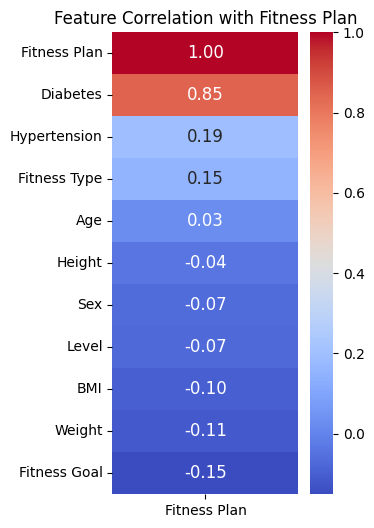

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cleaned_data.corr()

correlation = correlation_matrix['Fitness Plan'].sort_values(ascending=False)

plt.figure(figsize=(3, 6))
sns.heatmap(correlation.values.reshape(-1, 1), annot=True, cmap='coolwarm', cbar=True,
            xticklabels=['Fitness Plan'], yticklabels=correlation.index,
            annot_kws={'size': 12}, fmt='.2f')

plt.title('Feature Correlation with Fitness Plan')
plt.xticks()
plt.yticks()

plt.show()

In [9]:
cleaned_data.shape

(11965, 11)